**Neural Network Model**






**Forest fires dataset**

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading dataset

In [4]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**DATA PREPROCESSING**

In [5]:
data['size_category'] = data['size_category'].map({'large': 1, 'small': 0})
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data2=data.drop(['month', 'day'],1)
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# split into input (X) and output (Y) variables
x = data2.iloc[:,0:28]
y = data2.iloc[:,28]

**Model Building**

In [8]:
# create model with 3 Hidden layers

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model with no.of epochs =150 and batch_size= 10

In [12]:
m=model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 10ms/step - loss: 0.6309 - accuracy: 0.7514 - val_loss: 0.6478 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.7572 - val_loss: 0.6708 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.7572 - val_loss: 0.6501 - val_accuracy: 0.6784
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7572 - val_loss: 0.6471 - val_accuracy: 0.6842
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.7601 - val_loss: 0.6273 - val_accuracy: 0.6901
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7688 - val_loss: 0.5855 - val_accuracy: 0.7076
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7775 - val_loss: 0.6397 - val_accuracy: 0.7076
Epoch 8/150


In [13]:
# evaluating the model and finding best accuracy

In [14]:
scores = model.evaluate(x, y)
(model.metrics_names[1], scores[1]*100)

17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9884


('accuracy', 98.8394558429718)

**We got accuracy of 98.6% (best accuracy) with 150 epochs and batch_size as 10.So, there is no need of tuning parameters for getting better accuracy.**

In [15]:
m.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
# Model accuracy with different no.of epochs

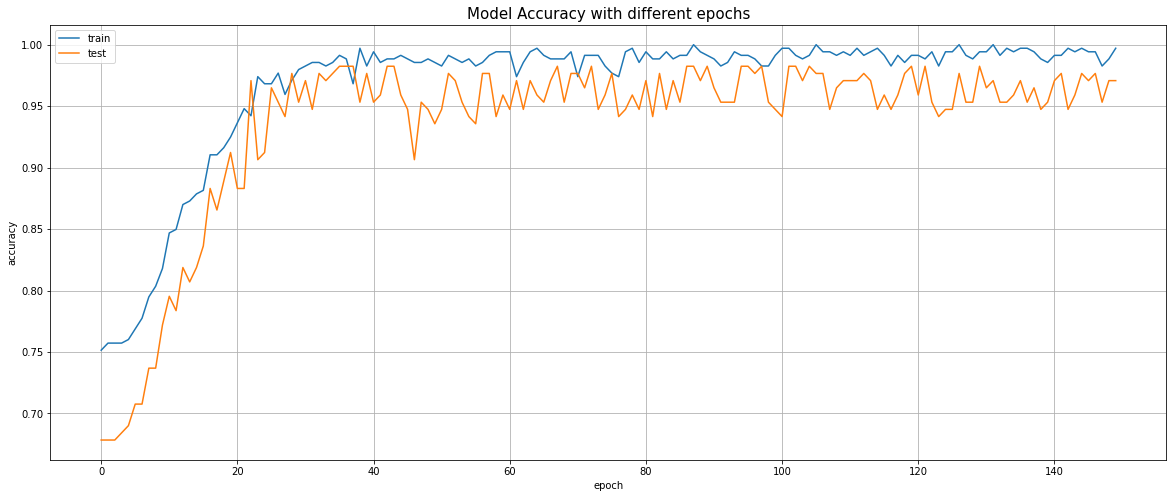

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model Accuracy with different epochs',fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

**In the above graph we can see after 40 epochs there is no big difference between train and test accuracy .So, we can use any epoch size >40 for better accuracy and better model**